In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import missingno as mso
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
orig_df=pd.read_csv("tp_and_ela.csv")

<Axes: >

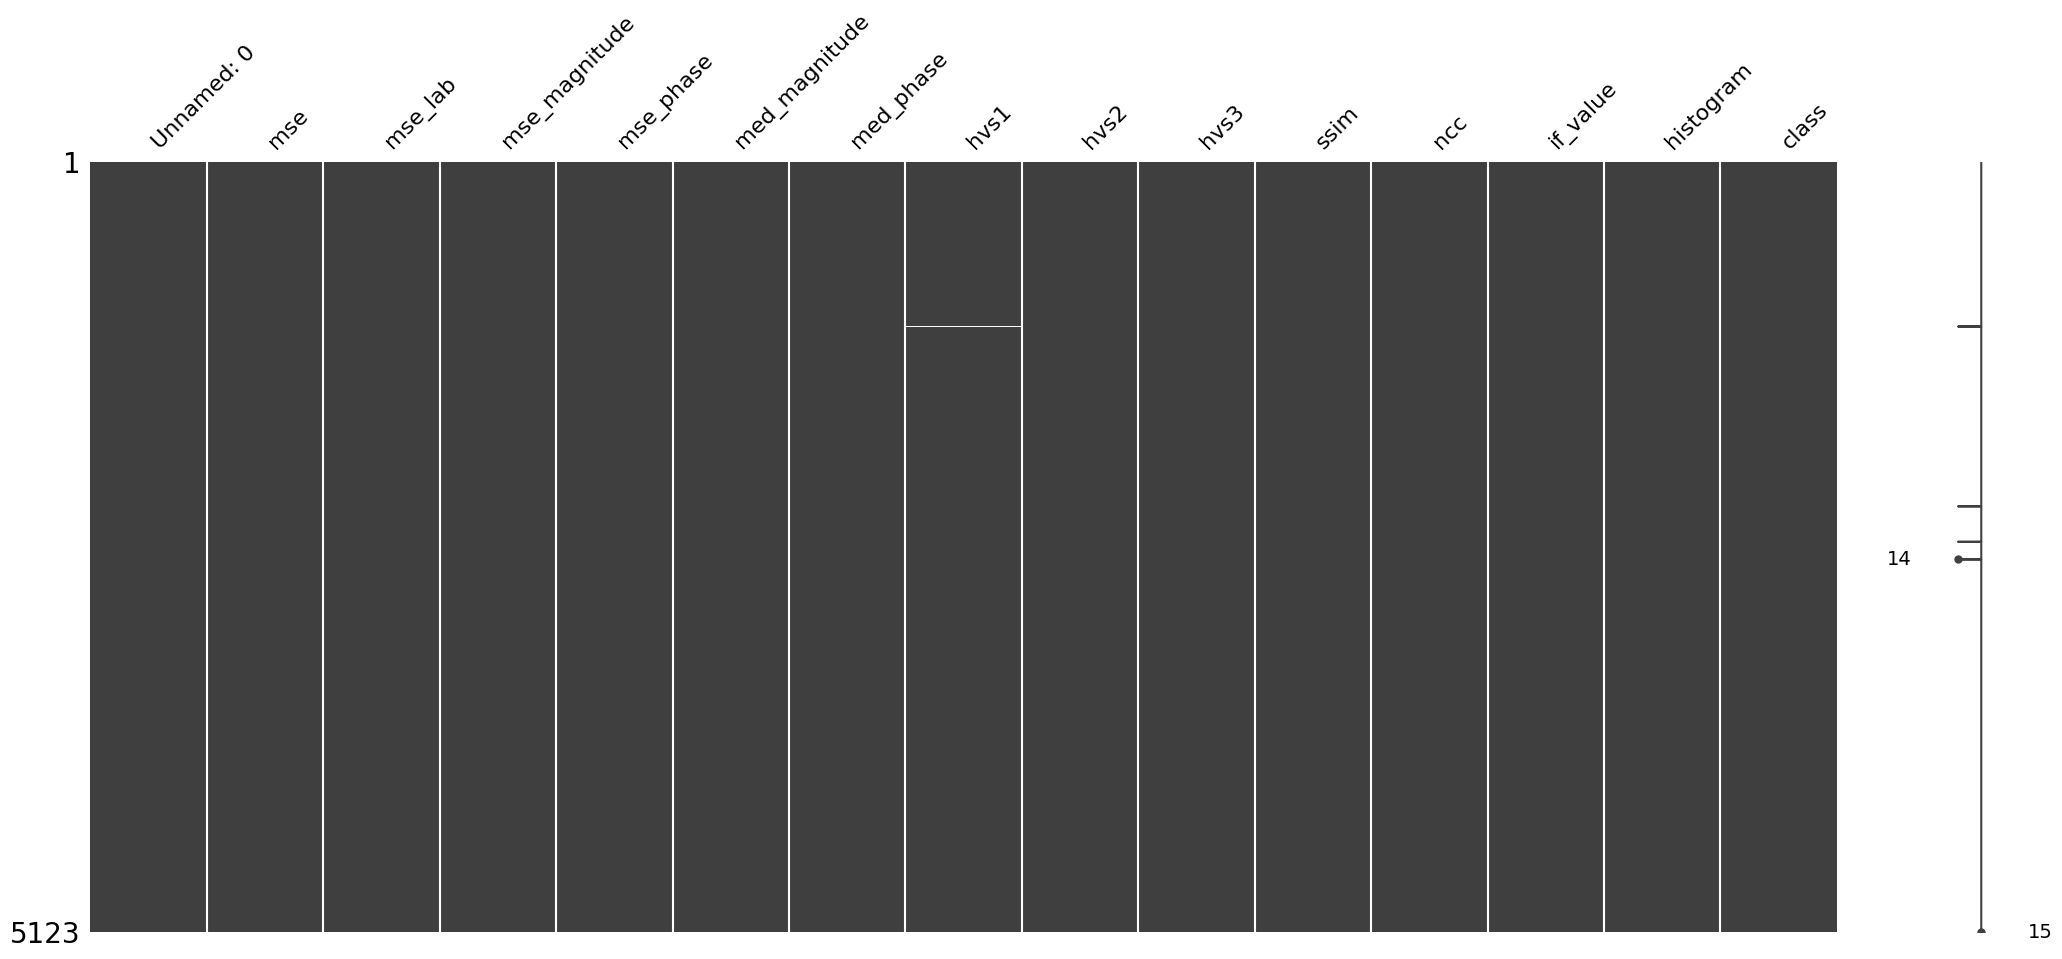

In [3]:
mso.matrix(orig_df)

In [4]:
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5123 entries, 0 to 5122
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     5123 non-null   int64  
 1   mse            5123 non-null   float64
 2   mse_lab        5123 non-null   float64
 3   mse_magnitude  5123 non-null   float64
 4   mse_phase      5123 non-null   float64
 5   med_magnitude  5123 non-null   float64
 6   med_phase      5123 non-null   float64
 7   hvs1           5119 non-null   float64
 8   hvs2           5123 non-null   float64
 9   hvs3           5123 non-null   float64
 10  ssim           5123 non-null   float64
 11  ncc            5123 non-null   float64
 12  if_value       5123 non-null   float64
 13  histogram      5123 non-null   float64
 14  class          5123 non-null   object 
dtypes: float64(13), int64(1), object(1)
memory usage: 600.5+ KB


In [5]:
# Create a new dataframe with only the features we want to use for PCA and clustering (column with numerical - int and float - values)
num_cols=orig_df.select_dtypes(include=['int64','float64'])
df=orig_df[num_cols.columns]
df=df.drop('Unnamed: 0',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5123 entries, 0 to 5122
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mse            5123 non-null   float64
 1   mse_lab        5123 non-null   float64
 2   mse_magnitude  5123 non-null   float64
 3   mse_phase      5123 non-null   float64
 4   med_magnitude  5123 non-null   float64
 5   med_phase      5123 non-null   float64
 6   hvs1           5119 non-null   float64
 7   hvs2           5123 non-null   float64
 8   hvs3           5123 non-null   float64
 9   ssim           5123 non-null   float64
 10  ncc            5123 non-null   float64
 11  if_value       5123 non-null   float64
 12  histogram      5123 non-null   float64
dtypes: float64(13)
memory usage: 520.4 KB


In [6]:
df.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace inf values with NaN
df = np.log1p(df) # Handle extremely large values by taking the log of the values
df.dropna(inplace=True) # Drop rows with NaN values

In [7]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)

In [8]:
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)
scaled_df.head()

,mse,mse_lab,mse_magnitude,mse_phase,med_magnitude,med_phase,hvs1,hvs2,hvs3,ssim,ncc,if_value,histogram
0,2.132648,-0.408424,2.193484,1.874232,0.868168,-0.716081,3.238438,0.706496,-0.975205,-2.753032,-0.479691,2.345738,-0.918019
1,0.844364,-0.213001,0.843418,1.216431,0.871176,-0.716081,-0.231914,-0.792505,-0.070535,-0.284232,-0.870873,0.824710,-0.039726
2,-0.711294,-0.670590,-0.748717,0.496801,-1.254953,-0.716081,-0.435257,1.901217,-0.521252,0.441252,-0.269735,-0.787443,0.720237
3,-1.248537,-0.685080,-1.283088,-0.856341,-1.254953,-0.716081,-0.233769,-0.744099,1.060276,0.464729,-0.164876,-1.173927,0.346578
4,1.812280,3.035459,1.857002,-1.507644,-0.125998,-0.716081,-0.349101,1.747029,-0.214132,-1.167719,1.390818,1.963994,-1.198993


In [9]:
# Applying PCA
pca=PCA(n_components=3)
pca_res=pca.fit_transform(scaled_df)
pca_df=pd.DataFrame(pca_res,columns=['PC1','PC2','PC3',]) # this is reduced dimensional dataframe


In [10]:
# for each principal compnent explained_variance_ratio tell us how much of the important information from the data is contained in that principal component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio: ", explained_variance_ratio)

Explained variance ratio:  [0.38567202 0.14912886 0.12660003]


In [11]:
px.scatter(pca_df, x='PC1', y='PC2',color='PC3')

In [12]:
px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3',color='PC3')

In [13]:
# Performing clustering using KMeans algorithm on pca_df which is a reduced dimensional dataframe
kmeans=KMeans(n_clusters=2,n_init='auto',random_state=42)
cluster=kmeans.fit_predict(pca_df)
pca_df['cluster']=cluster


In [14]:
pca_df

,PC1,PC2,PC3,cluster
0,5.843378,1.759324,0.821387,1
1,1.473096,0.632160,-1.068151,1
2,-1.330500,1.582184,1.094071,0
3,-2.748072,0.703131,-0.147954,0
4,2.866070,-2.916756,2.684261,1
...,...,...,...,...
5113,3.232298,0.656716,-0.586800,1
5114,2.308760,0.826264,-1.327790,1
5115,0.315503,0.365508,-0.582495,0
5116,-1.517431,0.436040,-0.600371,0


In [15]:
pca_df['cluster'].value_counts()

cluster
0    3452
1    1666
Name: count, dtype: int64

In [16]:
px.scatter(pca_df, x='PC1', y='PC2',color='cluster')

In [17]:
px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3',color='cluster')

array([[<Axes: title={'center': 'mse'}>,
        <Axes: title={'center': 'mse_lab'}>,
        <Axes: title={'center': 'mse_magnitude'}>,
        <Axes: title={'center': 'mse_phase'}>],
       [<Axes: title={'center': 'med_magnitude'}>,
        <Axes: title={'center': 'med_phase'}>,
        <Axes: title={'center': 'hvs1'}>,
        <Axes: title={'center': 'hvs2'}>],
       [<Axes: title={'center': 'hvs3'}>,
        <Axes: title={'center': 'ssim'}>,
        <Axes: title={'center': 'ncc'}>,
        <Axes: title={'center': 'if_value'}>],
       [<Axes: title={'center': 'histogram'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

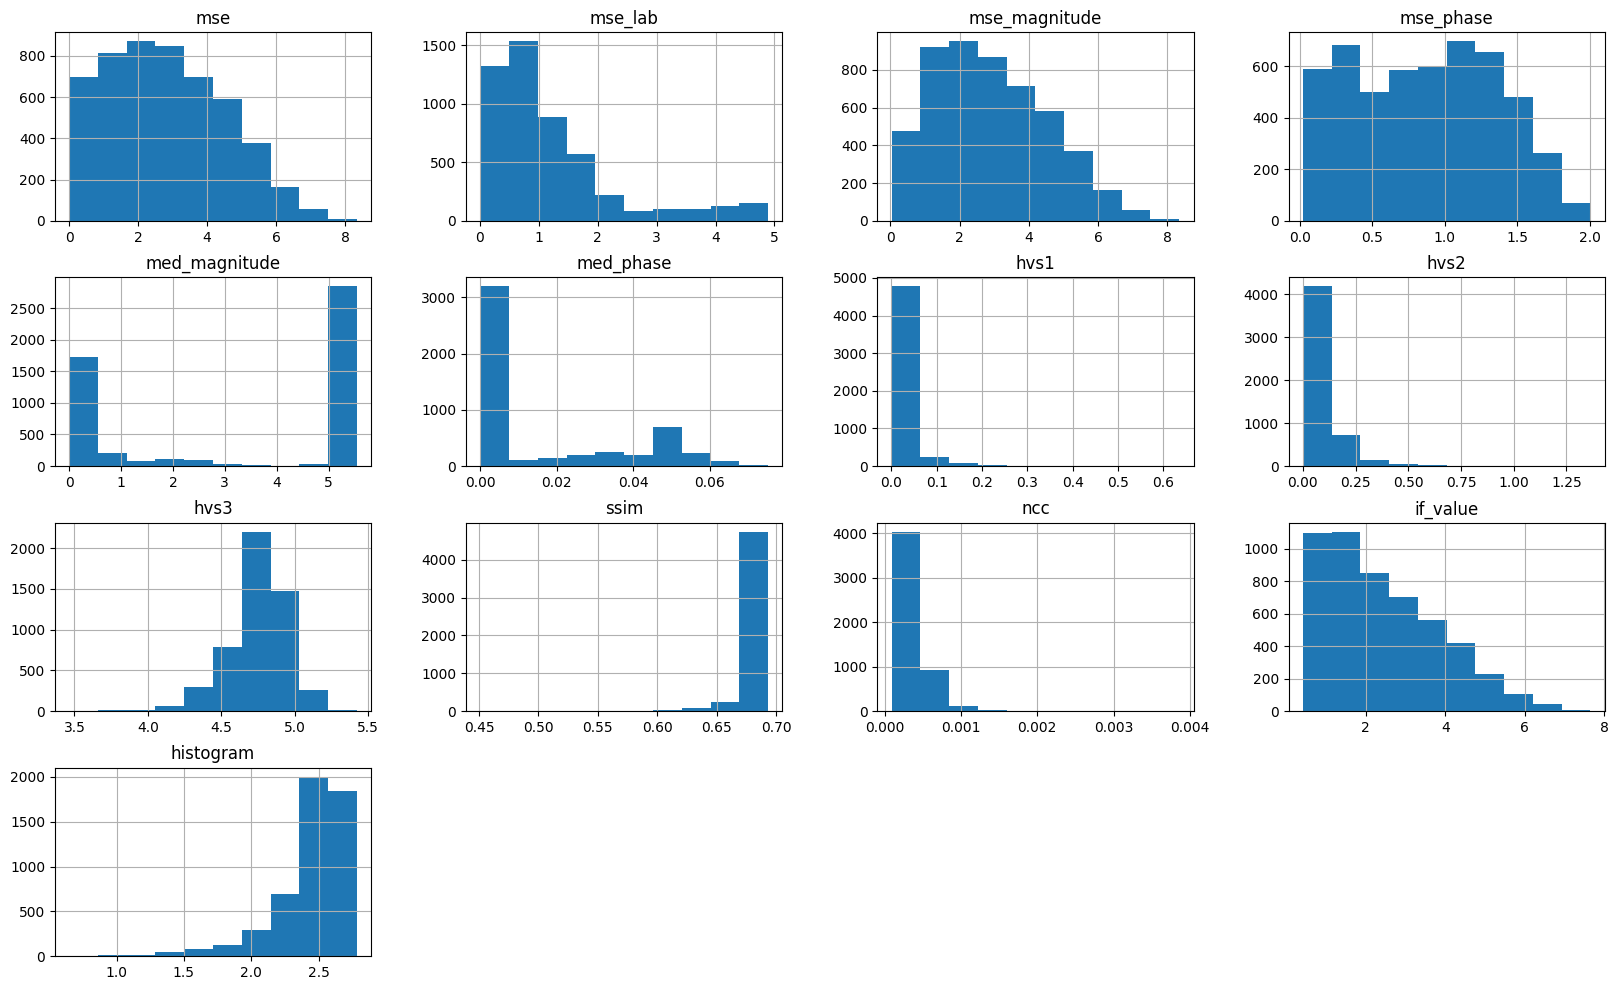

In [18]:
df.hist(figsize=(20, 12))